In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Style plot
plt.style.use('bmh')

In [2]:
import sys
sys.path.append('../')
from classes.fbref import FBRef

## Principal module to extract data:

In [3]:
data = FBRef()

## Select how to scrap it:

I want to collect all the important information about the single game.

In [4]:
match_stats = data.get_match('https://fbref.com/en/matches/44b9a07c/West-Ham-United-Chelsea-August-20-2023-Premier-League')

`match_stats` will have all the data from game, including `Match`, `Home`, `Away`, `Shots` and `Stats`.

## Let's do the XT Measure:
For this I have to use the shots and select all the important aspects of each player.

In [5]:
### Select teams
home_team = match_stats['Home']['Home']
away_team = match_stats['Away']['Away']

In [6]:
##
rows_shots = ['Player', 'Sh', 'xG', 'Pos', 'Min', 'Player ID']

# Home Team
home_shots = home_team['Summary'][rows_shots]
home_shots = home_shots[home_shots['Sh'] > 0]

# Away team
away_shots = away_team['Summary'][rows_shots]
away_shots = away_shots[away_shots['Sh'] > 0]

In [7]:
## Function to put the text to the side of the plot:
def text_plot(x, y, labels, color): 
    for x_val, y_val, name in zip(x, y, labels):
        plt.text(x_val + 0.07, y_val, name, fontsize=8, animated=True, ha='left', color=color, alpha=0.8)

The player that was much closer to make a Goal:  Nicolas Jackson


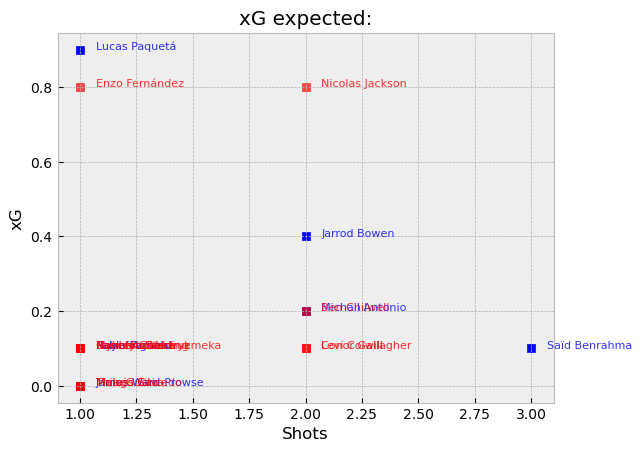

In [8]:
### Plot the data
# Home
plt.scatter(home_shots['Sh'].values, home_shots['xG'].values, color='blue', marker='s')
data.text_plot(home_shots['Sh'].values, home_shots['xG'].values, home_shots['Player'].values, 'blue')
#Away
plt.scatter(away_shots['Sh'].values, away_shots['xG'].values, color='red', marker='s', alpha=0.7)
data.text_plot(away_shots['Sh'].values, away_shots['xG'].values, away_shots['Player'].values, 'red')
##
plt.title('xG expected:')
plt.xlabel('Shots')
plt.ylabel('xG')
plt.grid(True)

## Player most close to make a goal
player_goal = pd.concat([home_shots[home_shots['xG'] == home_shots['xG'].max()], away_shots[away_shots['xG'] == away_shots['xG'].max()]])
player_goal = player_goal.sort_values(by=['Sh', 'xG'], ascending=False, ignore_index=True)
### Grab the one that has more shots
print('The player that was much closer to make a Goal: ', player_goal['Player'][0])

## Passes overall for CM: 
Here I will take the passes of the midfielders measured with the actual passes.

In [9]:
## shots Info
rows_passes = [('Unnamed: 0_level_0', 'Player'), ('Unnamed: 3_level_0', 'Pos'), ('Unnamed: 5_level_0', 'Min'), ('Total', 'Cmp'), ('Total', 'Att'), ('Total', 'Cmp%'), ('Unnamed: 22_level_0', 'xA'), ('Unnamed: 27_level_0', 'PrgP'), ('Player ID', '')]

# Home passes
home_passes = home_team['Passing']
home_passes = home_passes.loc[:, rows_passes]
### Minutes: 
home_passes = home_passes[home_passes[('Unnamed: 5_level_0', 'Min')] >= 45]

# Away Passes
away_passes = away_team['Passing']
away_passes = away_passes.loc[:, rows_passes]
### Minutes:
away_passes = away_passes[away_passes[('Unnamed: 5_level_0', 'Min')] >= 45]

## Now it's time to filter the midfielders:
Measure best average of passes of the midfielders.

In [10]:
#### List of positions
cm_list = ['CM', 'LM', 'RM', 'DM', 'AM']

## Home
home_pos = home_passes['Unnamed: 3_level_0'].applymap(lambda cell_value: data.contains_pos(cell_value, cm_list))

## Away
away_pos = away_passes['Unnamed: 3_level_0'].applymap(lambda cell_value: data.contains_pos(cell_value, cm_list))

### Filter the teams
home_passes = home_passes[home_pos['Pos']]
away_passes = away_passes[away_pos['Pos']]

home_passes

Unnamed: 0_level_0 Unnamed: 3_level_0 Unnamed: 5_level_0 Total            \
              Player                Pos                Min   Cmp Att  Cmp%   
5      Lucas Paquetá              AM,LW                 90    26  38  68.4   
6  James Ward-Prowse                 DM                 80    22  26  84.6   
8       Tomáš Souček                 DM                 90    15  23  65.2   

  Unnamed: 22_level_0 Unnamed: 27_level_0 Player ID  
                   xA                PrgP            
5                 0.0                   4  9b6f7fd5  
6                 0.1                   3  3515d404  
8                 0.0                   1  6613c819

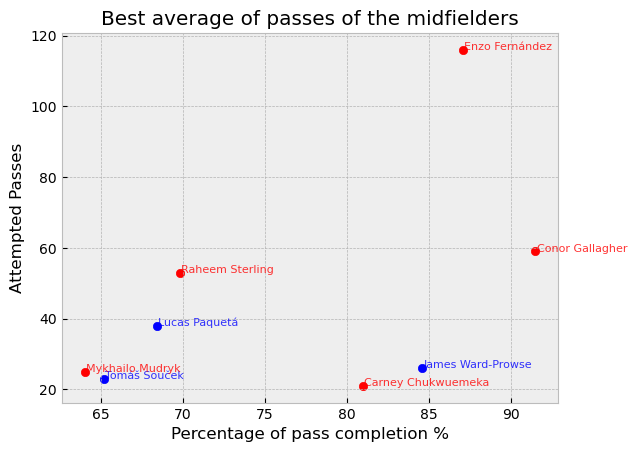

In [11]:
### Plot Attempted passes and completed ones:
# Home
plt.scatter(home_passes[('Total', 'Cmp%')], home_passes[('Total', 'Att')], color='blue')
data.text_plot(home_passes[('Total', 'Cmp%')], home_passes[('Total', 'Att')], home_passes[('Unnamed: 0_level_0', 'Player')], 'blue')
# Away
plt.scatter(away_passes[('Total', 'Cmp%')], away_passes[('Total', 'Att')], color='red')
data.text_plot(away_passes[('Total', 'Cmp%')], away_passes[('Total', 'Att')], away_passes[('Unnamed: 0_level_0', 'Player')], 'red')
### 
plt.title('Best average of passes of the midfielders')
plt.xlabel('Percentage of pass completion %')
plt.ylabel('Attempted Passes')
plt.grid(True)

## Plot the xG/xA

In [12]:
## disable error
pd.options.mode.chained_assignment = None
### Rows danger
rows_shots = ['Player', 'xG', 'Pos', 'Min', 'Player ID']
### xG/xA
# Home
home_danger = home_team['Summary'][rows_shots]
home_danger.loc[:, 'xA'] = home_team['Passing'][('Unnamed: 22_level_0', 'xA')].copy()
home_danger = home_danger[(home_danger['Min'] >= 45) & (home_danger['xG'] > 0) & (home_danger['xA'] > 0)]

# Away
away_danger = away_team['Summary'][rows_shots]
away_danger.loc[:, 'xA'] = away_team['Passing'][('Unnamed: 22_level_0', 'xA')].copy()
away_danger = away_danger[(away_danger['Min'] >= 45) & (away_danger['xG'] > 0) & (away_danger['xA'] > 0)]

away_danger

,Player,xG,Pos,Min,Player ID,xA
2,Mykhailo Mudryk,0.1,"WB,AM",45,049a888d,0.2
3,Raheem Sterling,0.1,"AM,FW",90,b400bde0,0.2
6,Enzo Fernández,0.8,CM,90,5ff4ab71,0.4
7,Ben Chilwell,0.2,WB,60,d2424d1b,0.5


#### Filtering positions:

In [13]:
### Positions
attack_list = ['CM', 'LM', 'RM', 'DM', 'AM', 'FW', 'LW', 'RW']
### Filtering positions
#Home
home_pos_attack = home_danger[['Pos']].applymap(lambda cell_value: data.contains_pos(cell_value, attack_list))

#Away
away_pos_attack = away_danger[['Pos']].applymap(lambda cell_value: data.contains_pos(cell_value, attack_list))

### Finalize
home_danger = home_danger[home_pos_attack['Pos']]
away_danger = away_danger[away_pos_attack['Pos']]

home_danger

""


In [14]:
### All the players capable:
all_danger = pd.concat([home_danger, away_danger])
all_danger = all_danger.sort_values(by=['xG', 'xA'], ascending=False, ignore_index=True)

print('The most dangerous player on the pitch was: ', all_danger['Player'][0])

The most dangerous player on the pitch was:  Enzo Fernández


## Plot the data:

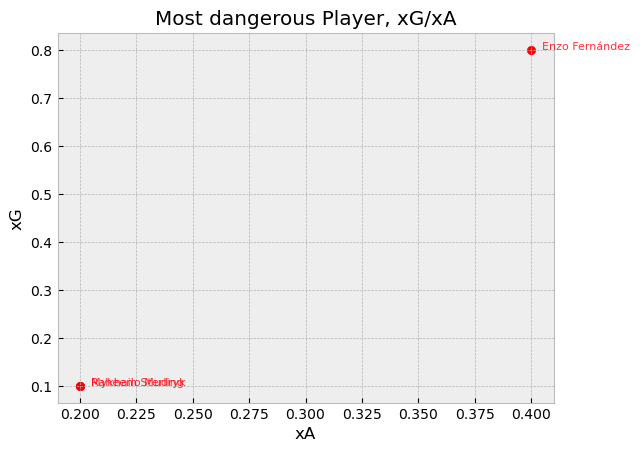

In [20]:
### plot the scatter
# Home
if len(home_danger) != 0:
    plt.scatter(home_danger['xA'], home_danger['xG'], color='green')
    data.text_plot(home_danger['xA'], home_danger['xG'], home_danger['Player'], 'green', distance=0.005)

# Away
if len(away_danger) != 0:
    plt.scatter(away_danger['xA'].values, away_danger['xG'].values, color='red')
    data.text_plot(away_danger['xA'].values, away_danger['xG'].values, away_danger['Player'].values, 'red', distance=0.005)

### Parameters
plt.title('Most dangerous Player, xG/xA')
plt.xlabel('xA')
plt.ylabel('xG')
plt.grid(True)